In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
#os.environ['PROJ_LIB'] = r'C:\Users\Work\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

In [2]:
method = 'MVA'                  #change accordingly for calibration method: MVA, CCR, LR
#init_date = ['0328','0331','0404','0407','0411','0414','0418','0421','0425']
init_date = '0411'              #change accordingly
#week_no = ['1','2','3','4']    
week_no = '1'                   #change accordingly

###################################################################################

dir1 = '/Users/regin/Desktop/S2Scalibrationextremeheatpart2/data/verification/ROCArea/raw_vs_obs/'
rawROC_file = dir1 + 'raw_ROCA_AN_2016' + init_date + '_week' + week_no + '.nc'
rawROC_data = Dataset(rawROC_file, mode='r')

dir2 = '/Users/regin/Desktop/S2Scalibrationextremeheatpart2/data/verification/ROCArea/cal_vs_obs/'
calROC_file = dir2 + 'cal_' + method + '_ROCA_AN_2016' + init_date + '_week' + week_no + '.nc'
calROC_data = Dataset(calROC_file, mode='r')

In [3]:
lons = rawROC_data.variables['lon'][:]
lats = rawROC_data.variables['lat'][:]
rawROC_tass = np.transpose(rawROC_data.variables['tas'][:]) #have to transpose from (lon,lat) to (lat,lon)
calROC_tass = np.transpose(calROC_data.variables['tas'][:])
rawROC_data.close()
calROC_data.close()
print(rawROC_tass.shape)
print(calROC_tass.shape)
#Compute skill score
skill_score = np.empty([len(lats),len(lons)])
skill_score = (calROC_tass-rawROC_tass)/(1-rawROC_tass)
max = np.max(skill_score)
min = np.min(skill_score)
ave = np.mean(skill_score)
print(max)
print(min)
print(ave)

(22, 35)
(22, 35)
1.0
-4.5
-0.30285996198654175


C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\regin\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: MatplotlibDeprecationWarning: 
The dedent function was deprecated in 

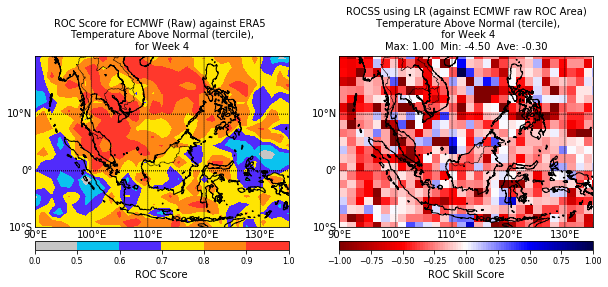

In [4]:
# Get some parameters for the Mercator Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

fig = plt.figure(figsize=(10,10))

#first plot
ax = fig.add_subplot(1,2,1)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
cmap = mpl.colors.ListedColormap(["#C6C6C6","#0AC2EF","#512BFB","#FFE502","#FF8715","#FF382C"])
label = "ROC Score"
bounds = [0.0,0.5,0.6,0.7,0.8,0.9,1.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot Data
cs = m.contourf(xi,yi,np.squeeze(rawROC_tass),bounds,cmap=cmap,norm= norm)

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%")
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Suptitle and Title
#Make sure to do Above Normal (AN) and Below Normal (BN) one at a time, just in case
plt.title('ROC Score for ECMWF (Raw) against ERA5 \nTemperature Above Normal (tercile),' '\nfor Week ' + week_no,fontsize=10)
#plt.title('ROC Score for ECMWF (Raw) against ERA5 \nTemperature Below Normal (tercile),' '\nfor Week ' + week_no,fontsize=10)

# Second plot
ax = fig.add_subplot(1,2,2)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the label
label = "ROC Skill Score"

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(skill_score),cmap=plt.cm.get_cmap('seismic_r',100))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%")
plt.clim(-1,1)
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Suptitle and Title 
plt.title('ROCSS using ' + method +  ' (against ECMWF raw ROC Area)\n Temperature Above Normal (tercile),\n for Week ' + week_no + '\nMax: ' + str("%.2f" % max) + '  Min: ' + str("%.2f" % min) + '  Ave: ' + str("%.2f" % ave),fontsize=10)
#plt.title('ROCSS using ' + method +  ' (against ECMWF raw ROC Area)\n Temperature Below Normal (tercile),\n for Week ' + week_no + '\nMax: ' + str("%.2f" % max) + '  Min: ' + str("%.2f" % min) + '  Ave: ' + str("%.2f" % ave),fontsize=10)

#plt.tight_layout()
plt.show()